In [1]:
import torch
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler

model_id = 'stabilityai/stable-diffusion-2'

# Use the Euler scheduler here instead
scheduler = EulerDiscreteScheduler.from_pretrained(
  model_id,
  num_train_timesteps=1000,
  subfolder="scheduler"
)
pipe = StableDiffusionPipeline.from_pretrained(
  model_id,
  torch_dtype=torch.float16,
  scheduler=scheduler
)
pipe = pipe.to('cuda')
pipe.enable_xformers_memory_efficient_attention()

  0%|          | 0/100 [00:00<?, ?it/s]

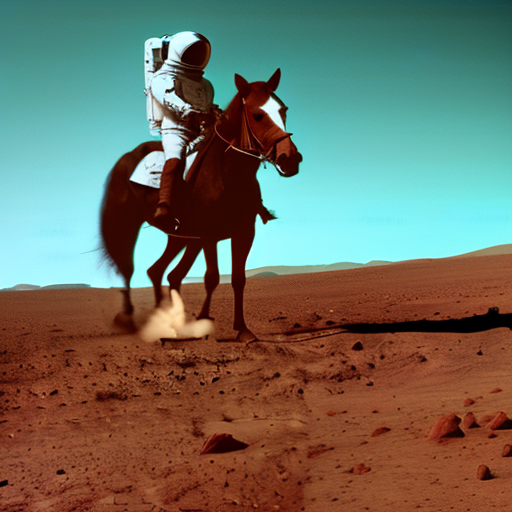

In [2]:
prompt = 'a photo of an astronaut riding a horse on mars'
args = dict(
  width=512,
  height=512,
  num_inference_steps=100,
  guidance_scale=10.0,
)
pipe(prompt, **args).images[0]

  0%|          | 0/100 [00:00<?, ?it/s]

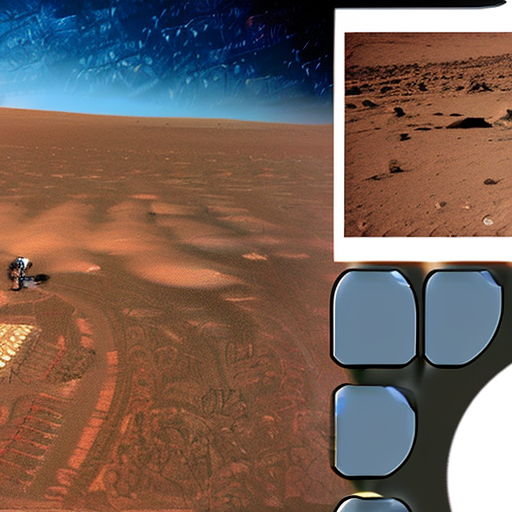

In [3]:
args = dict(
  width=512,
  height=512,
  num_inference_steps=100,
  guidance_scale=6.0,
)
pipe(prompt, **args).images[0]

In [4]:
print(pipe)

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.18.1",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "requires_safety_checker": false,
  "safety_checker": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "EulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}



In [5]:
print(pipe.scheduler)

EulerDiscreteScheduler {
  "_class_name": "EulerDiscreteScheduler",
  "_diffusers_version": "0.18.1",
  "beta_end": 0.012,
  "beta_schedule": "scaled_linear",
  "beta_start": 0.00085,
  "clip_sample": false,
  "interpolation_type": "linear",
  "num_train_timesteps": 1000,
  "prediction_type": "v_prediction",
  "set_alpha_to_one": false,
  "skip_prk_steps": true,
  "steps_offset": 1,
  "timestep_spacing": "linspace",
  "trained_betas": null,
  "use_karras_sigmas": false
}



  0%|          | 0/100 [00:00<?, ?it/s]

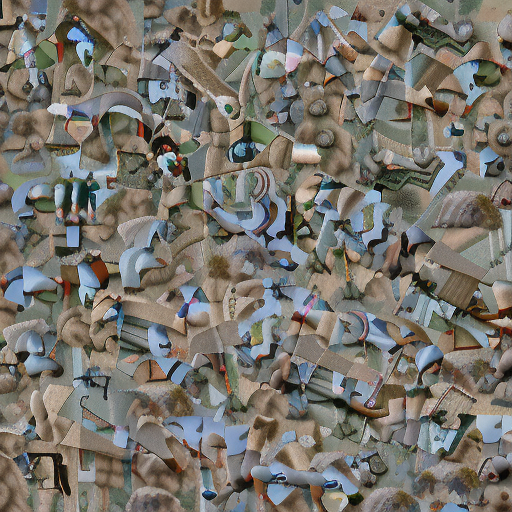

In [6]:
pipe.scheduler = EulerDiscreteScheduler.from_pretrained(
  model_id,
  num_train_timesteps=100,
  subfolder="scheduler"
)

args = dict(
  width=512,
  height=512,
  num_inference_steps=100,
  guidance_scale=6.6,
)
pipe(prompt, **args).images[0]

  0%|          | 0/100 [00:00<?, ?it/s]

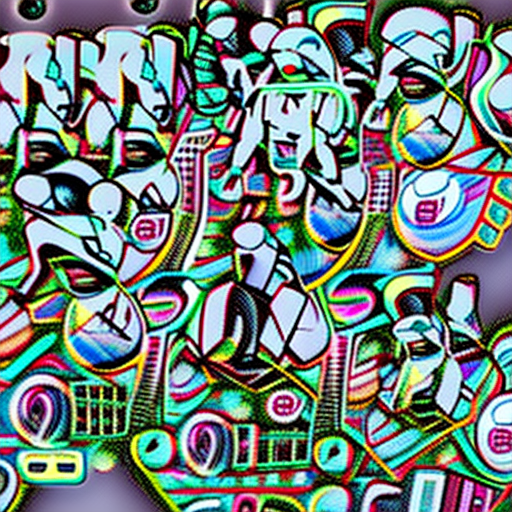

In [7]:
pipe.scheduler = EulerDiscreteScheduler.from_pretrained(
  model_id,
  num_train_timesteps=500,
  subfolder="scheduler"
)

args = dict(
  width=512,
  height=512,
  num_inference_steps=100,
  guidance_scale=6.6,
)
pipe(prompt, **args).images[0]

  0%|          | 0/100 [00:00<?, ?it/s]

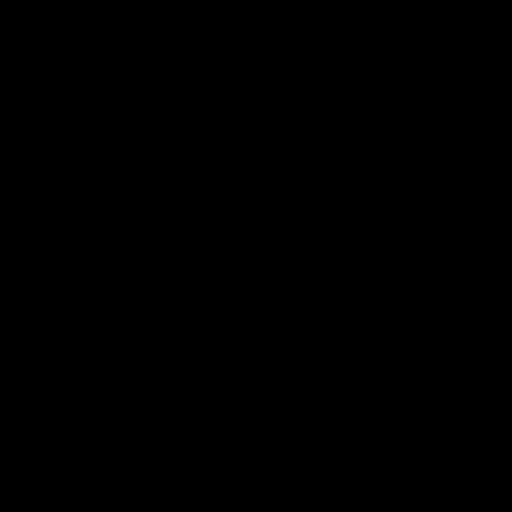

In [9]:
pipe.scheduler = EulerDiscreteScheduler.from_pretrained(
  model_id,
  num_train_timesteps=10000,
  subfolder="scheduler"
)

args = dict(
  width=512,
  height=512,
  num_inference_steps=100,
)
pipe(prompt, **args).images[0]

  0%|          | 0/66 [00:00<?, ?it/s]

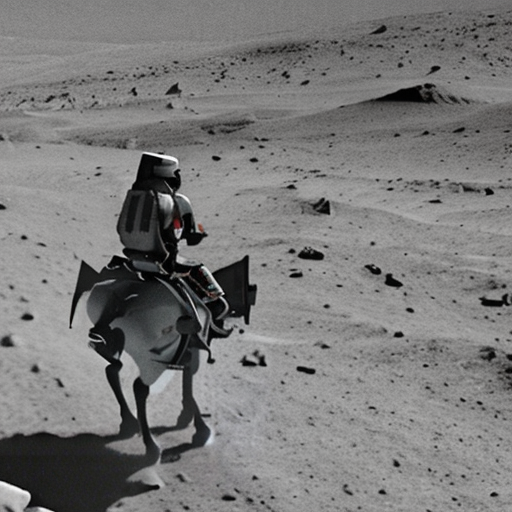

In [11]:
from diffusers import DDIMScheduler

pipe.scheduler = DDIMScheduler.from_pretrained(
  model_id,
  subfolder="scheduler"
)

args = dict(
  width=512,
  height=512,
  num_inference_steps=66,
)
pipe(prompt, **args).images[0]

  0%|          | 0/66 [00:00<?, ?it/s]

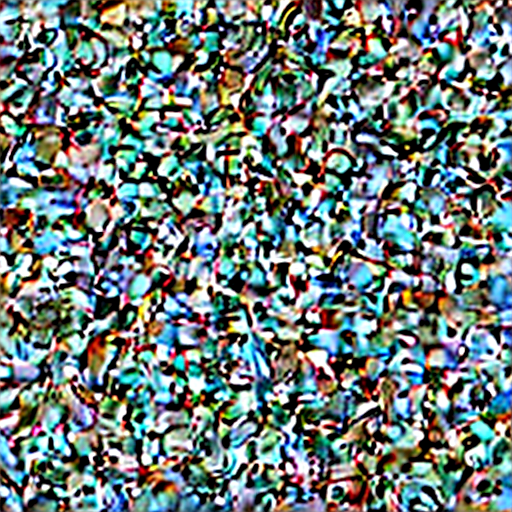

In [12]:
pipe.scheduler = DDIMScheduler.from_pretrained(
  model_id,
  num_train_timesteps=100,
  subfolder="scheduler"
)

args = dict(
  width=512,
  height=512,
  num_inference_steps=66,
)
pipe(prompt, **args).images[0]

  0%|          | 0/66 [00:00<?, ?it/s]

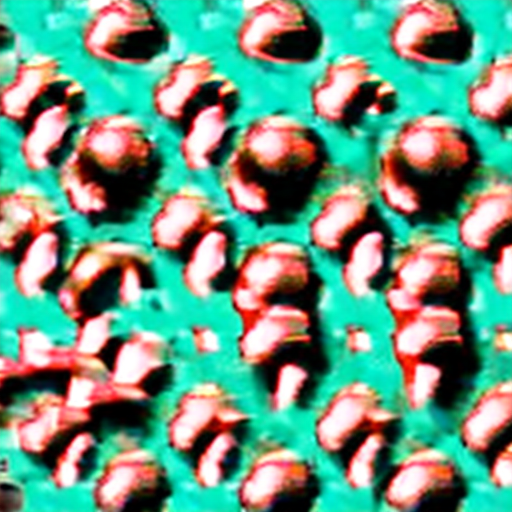

In [13]:
pipe.scheduler = DDIMScheduler.from_pretrained(
  model_id,
  num_train_timesteps=2000,
  subfolder="scheduler"
)

args = dict(
  width=512,
  height=512,
  num_inference_steps=66,
)
pipe(prompt, **args).images[0]

  0%|          | 0/66 [00:00<?, ?it/s]

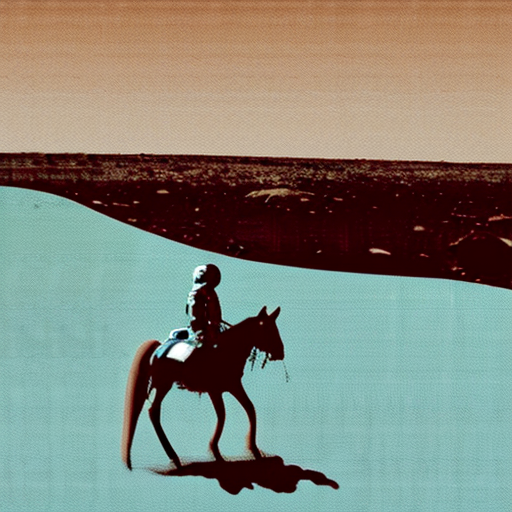

In [14]:
from diffusers import HeunDiscreteScheduler

pipe.scheduler = HeunDiscreteScheduler.from_pretrained(
  model_id,
  subfolder="scheduler"
)

args = dict(
  width=512,
  height=512,
  num_inference_steps=66,
)
pipe(prompt, **args).images[0]

  0%|          | 0/66 [00:00<?, ?it/s]

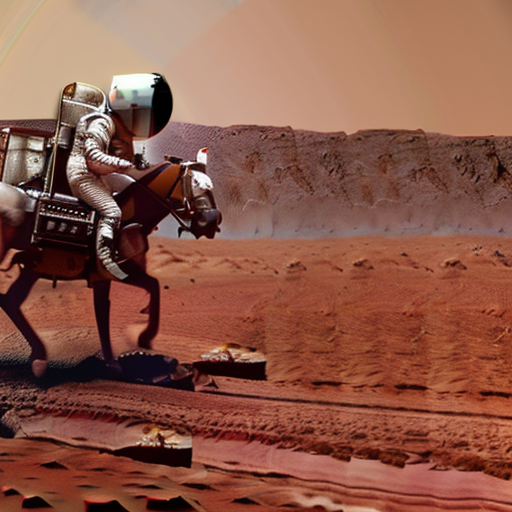

In [16]:
from diffusers import EulerAncestralDiscreteScheduler

pipe.scheduler = EulerAncestralDiscreteScheduler.from_pretrained(
  model_id,
  subfolder="scheduler"
)

args = dict(
  width=512,
  height=512,
  num_inference_steps=66,
)
pipe(prompt, **args).images[0]

  0%|          | 0/100 [00:00<?, ?it/s]

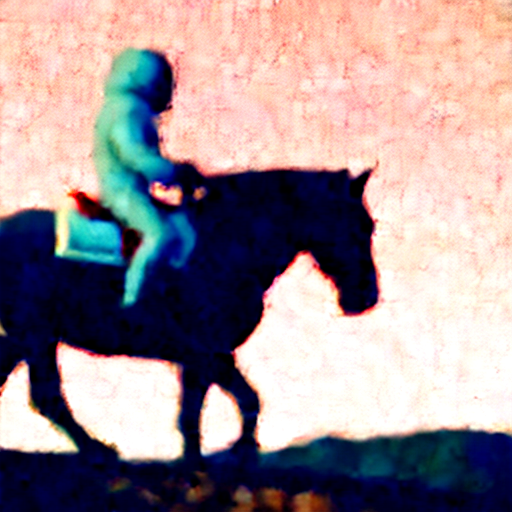

In [18]:
pipe.scheduler = EulerDiscreteScheduler.from_pretrained(
  model_id,
  interpolation_type='log_linear',
  subfolder="scheduler"
)

args = dict(
  width=512,
  height=512,
  num_inference_steps=100,
  guidance_scale=10,
)
pipe(prompt, **args).images[0]

  0%|          | 0/66 [00:00<?, ?it/s]

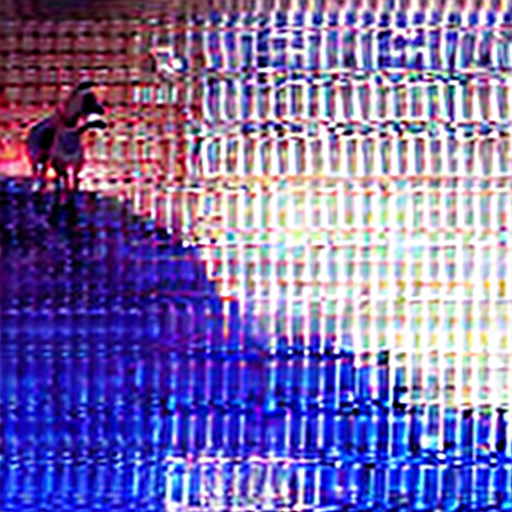

In [19]:
pipe.scheduler = EulerDiscreteScheduler.from_pretrained(
  model_id,
  num_train_timesteps=2000,
  interpolation_type='linear',
  subfolder="scheduler"
)

args = dict(
  width=512,
  height=512,
  num_inference_steps=66,
  guidance_scale=7.5,
)
pipe(prompt, **args).images[0]

  0%|          | 0/66 [00:00<?, ?it/s]

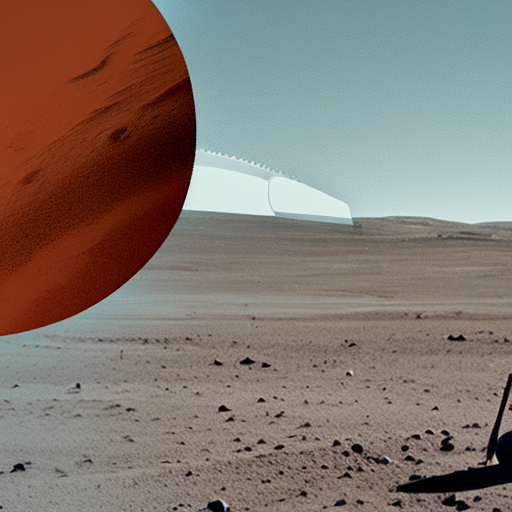

In [20]:
pipe.scheduler = EulerDiscreteScheduler.from_pretrained(
  model_id,
  num_train_timesteps=900,
  interpolation_type='linear',
  subfolder="scheduler"
)

args = dict(
  width=512,
  height=512,
  num_inference_steps=66,
  guidance_scale=7.5,
)
pipe(prompt, **args).images[0]

  0%|          | 0/66 [00:00<?, ?it/s]

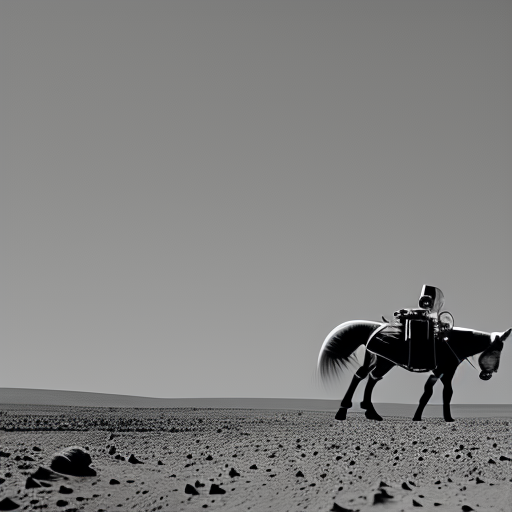

In [21]:
pipe.scheduler = EulerDiscreteScheduler.from_pretrained(
  model_id,
  num_train_timesteps=900,
  interpolation_type='linear',
  subfolder="scheduler"
)

args = dict(
  width=512,
  height=512,
  num_inference_steps=66,
  guidance_scale=10.0,
)
pipe(prompt, **args).images[0]

  0%|          | 0/66 [00:00<?, ?it/s]

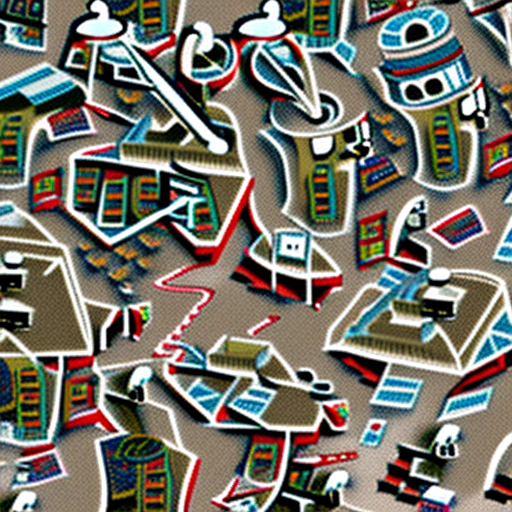

In [22]:
pipe.scheduler = EulerDiscreteScheduler.from_pretrained(
  model_id,
  num_train_timesteps=500,
  interpolation_type='linear',
  subfolder="scheduler"
)

args = dict(
  width=512,
  height=512,
  num_inference_steps=66,
  guidance_scale=20.0,
)
pipe(prompt, **args).images[0]